### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
sns.set()
warnings.filterwarnings("ignore")

In [28]:
# Code starts here

X=pd.read_csv('train.csv')
Y=X.iloc[:,1]
X.isna().sum()
X=X[X['ages']>0]
Y=X.iloc[:,1]
X=X.drop('list_price',axis=1)
X





# Code ends here.

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,8,202,2469,4.7,1,4.9,9,4.7,7,0
1,26,9,252,4.8,0,4.6,39,4.6,20,1
2,26,56,659,4.6,0,4.6,34,3.9,4,2
3,11,1,19,3.0,5,4.0,13,4.0,10,3
4,7,84,4016,4.5,1,3.9,34,3.5,10,4
...,...,...,...,...,...,...,...,...,...,...
8576,12,180,1,4.0,4,4.8,7,4.6,14,8576
8577,29,13,955,4.1,0,3.7,10,3.0,13,8577
8578,19,0,119,0.0,5,0.0,17,0.0,6,8578
8579,23,6,76,4.2,2,4.5,12,3.4,15,8579


### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

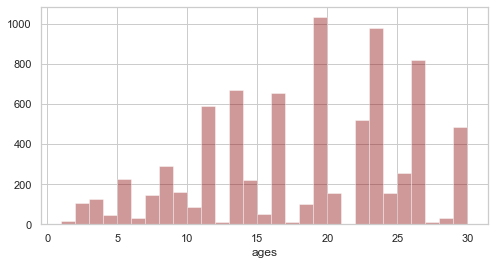

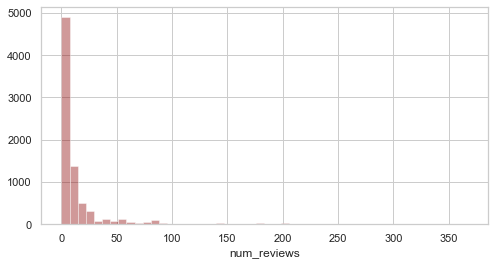

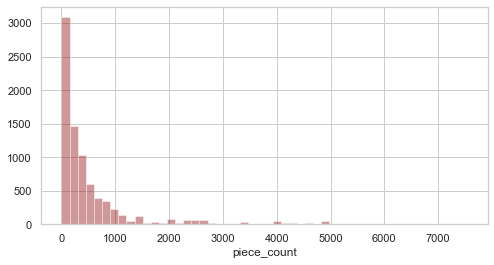

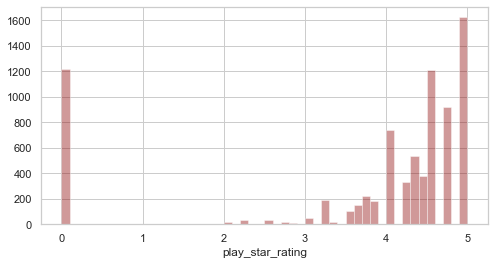

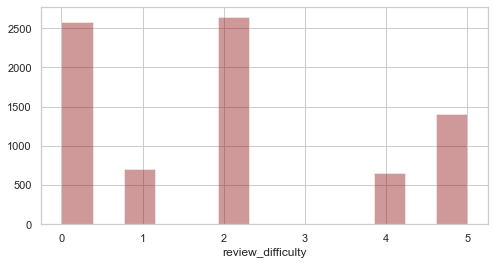

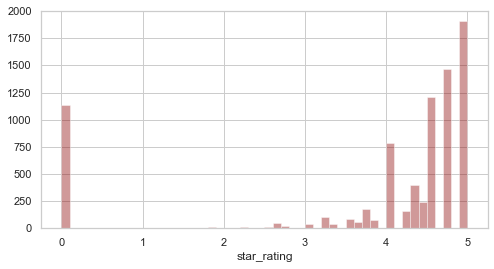

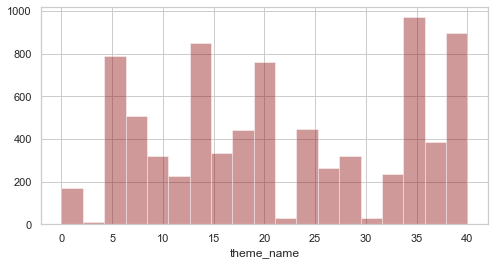

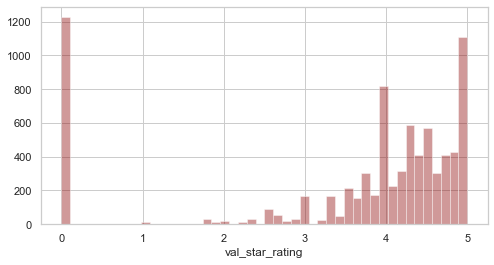

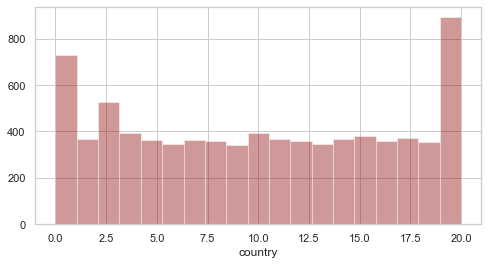

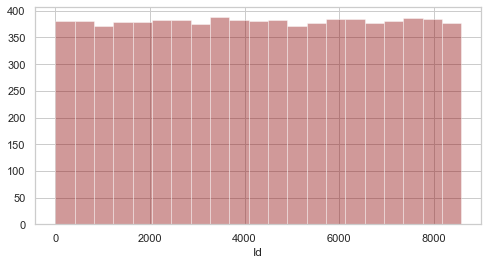

In [25]:
# Code starts here

numcols= X.select_dtypes(include=['number']).columns.tolist()
for i in numcols:
    plt.figure(figsize=(8,4))
    sns.set_style('whitegrid')
    sns.distplot(X[i],kde=False,color='darkred')
    plt.show()









# Code ends here.

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

In [38]:
# Code starts here
X=X.drop('Id',axis=1)










# Code ends here.

### Model building

In [39]:
# Code starts here
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)










# Code ends here.

### Residual check!

- Check the distribution of the residual.

In [41]:
# Code starts here
rme=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(rme,r2)










# Code ends here.

1652.3709063192675 0.7913140527560425


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [67]:
# Code starts here
test=pd.read_csv('test.csv')
testid=test.iloc[:,-1]
test=test.drop('Id',axis=1)









# Code ends here.

In [68]:
sub=model.predict(test)
submission=pd.DataFrame({'Id': testid, 'list_price': sub})
submission

,Id,list_price
0,9907,116.351370
1,5243,23.034588
2,8276,150.386012
3,6501,53.156160
4,1619,-11.015933
...,...,...
3674,2144,10.054234
3675,7242,60.294195
3676,11631,20.756148
3677,4639,23.876680


In [69]:
submission.to_csv('linreg2.csv',index=False)